<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Reecha Singh Kaggle Submission</h2>
<h4>DAT-5390 | Computational Data Analytics with Python</h4>
Chase Kusterer - Faculty of Analytics<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>

<h3>The Purpose of the Notebook</h3><br>
This Notebook is organized as a template for submitting on Kaggle. It will output a .csv file that can be submitted via Kaggle.<br><br>
Remember that you also need to provide an analysis alongside your model building via the assignment link on the course page. Start by conducting your analysis and then copy/paste relevant code to this template (missing value imputation, feature engineering, etc.). Please do not submit this template as your analysis (many of the technical steps are not necessary for the analysis). Finally, on the course page, make sure to submit your analysis and model development as one document in two formats (Jupyter Notebook and a .txt file).
<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Reminder: Model Analysis Tips</h3><br>
<strong>How fit should a model be?</strong><br>
As a general heuristic, if the training and testing scores are within 0.05 of each other, the model has not been overfit. Don't worry if the testing score ends up higher than the training score. Some sources claim that in such situations a model is underfit, but this is a general misconception that is beyond the scope of this course. For this course, long as the training and testing scores are within 0.05 of each other, the model is good to go.
<br><br>

<strong>Which model should I choose?</strong><br>
All models have their own benefits and drawbacks. Thus, it is important to test out more than one and to also explore their <a href="https://scikit-learn.org/stable/modules/classes.html#classical-linear-regressors">documentation</a>.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part I: Imports and Data Check</h2>

In [778]:
## Importing libraries ##

import numpy             as np                                                 # mathematical essentials
import pandas            as pd                                                 # data science essentials
import sklearn.linear_model                                                    # linear models
import matplotlib.pyplot as plt                                                # essential graphical output
import seaborn as sns                                                          # enhanced graphical output
import statsmodels.formula.api as smf                                          # regression modeling
from sklearn.model_selection import train_test_split                           # train/test split
from sklearn.neighbors import KNeighborsRegressor                              # KNN for Regression
from sklearn.preprocessing import StandardScaler                               # standard scaler
from sklearn.tree import DecisionTreeRegressor                                 # regression trees
from sklearn.tree import plot_tree                                             # tree plots
from sklearn.model_selection import RandomizedSearchCV                         # hyperparameter tuning
from sklearn.linear_model import Ridge
from scipy.stats import uniform
import warnings                                                                # warnings from code

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)




<br>

In [779]:
## Importing data ##

# reading modeling data into Python
modeling_data = './datasets/train.xlsx'

# calling this df_train
df_train = pd.read_excel(io         = modeling_data,
                         sheet_name = 'data',
                         header     = 0,
                         index_col  = 'ID')



# reading testing data into Python
testing_data = './datasets/test.xlsx'

# calling this df_test
df_test = pd.read_excel(io         = testing_data,
                        sheet_name = 'data',
                        header     = 0,
                        index_col  = 'ID')

In [781]:
# concatenating datasets together for mv analysis and feature engineering
#Setting Identifiers as integers to ensure they are retained later in the numeric file
df_train['set'] = 0 #'Not Kaggle'
df_test ['set'] = 1 #'Kaggle'

# concatenating both datasets together for mv and feature engineering
df_full = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)


# checking data
df_full.head(n = 5)

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,set
ID,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810000,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519.0,0
mb_1330,2023-10-26 08:59:53.355000,51,53,2.2,NaN,35.2,0.0,0.0,1.01,No,Yes,1251.0,0
mb_551,2023-09-23 21:59:57.250000,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685.0,0
mb_2103,2023-12-19 14:00:00,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0.0,0
mb_1430,2023-10-30 12:59:52.855000,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814.0,0


<br>

In [791]:
#Renaming columns so that they are easier to work with throughout the analysis
df_full.rename(columns={
    'Temperature(F)':         'Temp_F',
    'Humidity(%)':            'Hum_per',
    'Wind speed (mph)':       'WS_mph',
    'Visibility(miles)':      'V_miles',
    'DewPointTemperature(F)': 'DPT_F',
    'Rainfall(in)':           'R_in',
    'Snowfall(in)':           'S_in',
    'SolarRadiation(MJ/m2)':  'Solar_mJm2'
}, inplace=True)

<br>

<br>

<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part II: Data Preparation</h2><br>
Complete the following steps to prepare for model building. Note that you may add or remove steps as you see fit. Please see the assignment description for details on what steps are required for this project.
<br><br>
<h3>Base Modeling</h3>

In [783]:
# a. Determining dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations (rows): {df_full.shape[0]}
Features (columns) : {df_full.shape[1]}
""")

#This will give us an idea of how many inputs to expect in each column's count


Size of Original Dataset
------------------------
Observations (rows): 2184
Features (columns) : 13



In [784]:
#b. Gaining an understanding of data type and null values  

df_full.info(verbose = True)

#Observation: Null values observed across Visibility, DewPointTemperature, 
#SolarRadiation and Rentals (which is expected as only the training data has 
#rental information)

<class 'pandas.core.frame.DataFrame'>
Index: 2184 entries, mb_1039 to mb_1225
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateHour        2184 non-null   object 
 1   Temp_F          2184 non-null   int64  
 2   Hum_per         2184 non-null   int64  
 3   WS_mph          2184 non-null   float64
 4   V_miles         2108 non-null   float64
 5   DPT_F           2117 non-null   float64
 6   R_in            2184 non-null   float64
 7   S_in            2184 non-null   float64
 8   Solar_mJm2      2078 non-null   float64
 9   Holiday         2184 non-null   object 
 10  FunctioningDay  2184 non-null   object 
 11  RENTALS         1638 non-null   float64
 12  set             2184 non-null   int64  
dtypes: float64(7), int64(3), object(3)
memory usage: 238.9+ KB


In [785]:
#c. Understanding the distribution of numeric features 
df_full_stats = df_full.describe(include = 'number').round(decimals = 2)
# checking results
df_full_stats

,Temp_F,Hum_per,WS_mph,V_miles,DPT_F,R_in,S_in,Solar_mJm2,RENTALS,set
count,2184.00,2184.00,2184.00,2108.00,2117.00,2184.00,2184.00,2078.00,1638.00,2184.00
mean,57.39,59.23,3.34,9.65,42.04,0.00,0.00,0.55,828.15,0.25
std,12.86,18.69,2.07,3.49,14.00,0.04,0.02,0.81,657.60,0.43
min,26.00,13.00,0.00,0.00,-2.20,0.00,0.00,0.00,0.00,0.00
25%,48.00,44.00,1.80,7.40,33.40,0.00,0.00,0.00,241.50,0.00
50%,57.00,59.00,2.90,11.70,41.90,0.00,0.00,0.00,761.50,0.00
75%,68.00,74.00,4.50,12.40,51.60,0.00,0.00,0.98,1203.75,0.25
max,91.00,97.00,12.80,12.40,75.00,0.71,0.30,3.18,3303.00,1.00


Based on the distribution of the above data, there don't seem to be significant anomalies in the data to warrant their exclusion from the analysis going forward. 

<br><h3>Missing Value Analysis and Imputation</h3>

In [786]:
#a. Validating null values 
df_full.isnull().sum(axis = 0)

DateHour            0
Temp_F              0
Hum_per             0
WS_mph              0
V_miles            76
DPT_F              67
R_in                0
S_in                0
Solar_mJm2        106
Holiday             0
FunctioningDay      0
RENTALS           546
set                 0
dtype: int64

In [787]:
#b. Missing Value Imputation ##
# Creating a loop to create columns for those columns in which there are missing 
# data enteries

for col in df_full:

    # creating columns with 1s if missing and 0 if not
    if df_full[col].isnull().astype(int).sum() > 0:
        df_full['m_'+col] = df_full[col].isnull().astype(int)


In [789]:
#c. Checking results - summing missing value flags from the loop above
df_full[ ['m_V_miles', 'm_DPT_F', 'm_Solar_mJm2','m_RENTALS'] ].sum(axis = 0)

m_V_miles        76
m_DPT_F          67
m_Solar_mJm2    106
m_RENTALS       546
dtype: int64

In [793]:
#d. Subsetting for Missing Value features
mv_flag_check = df_full[ ['V_miles',   'm_V_miles', 
                          'DPT_F',     'm_DPT_F',
                          'Solar_mJm2','m_Solar_mJm2',
                          'RENTALS',   'm_RENTALS'] ]


#e. Checking results - Comparing original columns with the missing value flags
mv_flag_check.sort_values(by = ['m_V_miles', 'm_DPT_F', 'm_Solar_mJm2','m_RENTALS'],
                          ascending = False).head(n = 5)

,V_miles,m_V_miles,DPT_F,m_DPT_F,Solar_mJm2,m_Solar_mJm2,RENTALS,m_RENTALS
ID,,,,,,,,
mb_004,NaN,1,NaN,1,0.0,0,509.0,0
mb_006,NaN,1,NaN,1,0.0,0,252.0,0
mb_2047,NaN,1,33.4,0,NaN,1,NaN,1
mb_1926,NaN,1,34.0,0,NaN,1,141.0,0
mb_2046,NaN,1,34.2,0,NaN,1,161.0,0


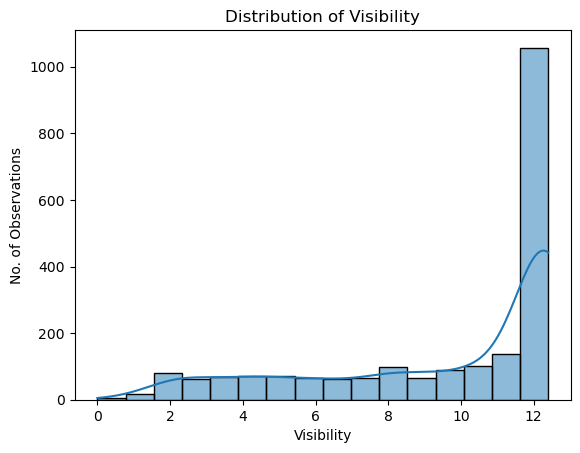

In [794]:
#f. Plotting each of the missing value features to gain and understanding 
#of their distribution and what number would be best to replace the missing
#value with. 
#f(1). Starting with Visibility(miles)
sns.histplot(x = 'V_miles',
            data = df_full,
            kde = True)


# title and labels
plt.title (label  = 'Distribution of Visibility')
plt.xlabel(xlabel = 'Visibility')
plt.ylabel(ylabel = 'No. of Observations')


# displaying the plot
plt.show()

In [799]:
df_full['V_miles'].value_counts()

V_miles
12.4    893
12.3     62
12.2     50
12.0     34
11.8     24
11.7     24
12.1     24
11.9     22
11.3     21
11.4     20
6.0      20
11.6     18
10.5     18
11.2     18
8.1      18
11.1     16
4.2      15
10.4     15
2.2      15
11.5     15
8.5      15
11.0     15
9.7      15
4.7      14
4.4      14
3.6      14
8.8      14
8.2      14
7.6      14
2.3      13
10.7     13
10.6     13
10.9     13
8.3      13
2.5      13
8.9      13
10.0     13
9.4      12
9.9      12
9.6      12
5.9      11
4.8      11
7.5      11
4.3      11
10.2     11
1.8      11
10.8     11
3.2      10
2.1      10
5.3      10
8.4      10
7.9      10
7.3      10
10.3     10
9.2      10
1.7      10
9.3      10
2.4      10
5.6      10
8.0      10
3.0      10
6.4       9
2.0       9
3.8       9
6.7       9
10.1      9
2.6       9
6.2       9
2.8       9
7.4       9
6.5       9
4.5       9
9.1       9
4.9       9
3.7       9
3.5       8
9.8       8
6.8       8
8.6       8
5.2       8
7.8       8
5.7       7
8.7     

In [800]:
# imputing Visibility(miles) with 9.65 which is the mean 
df_full['V_miles'].fillna(value   = 9.65   ,
                                   inplace = True)

In [801]:
# Verify if there are any missing values left
missing_values_after_imputation = df_full['V_miles'].isnull().sum()

print("Missing values after imputation:", missing_values_after_imputation)

Missing values after imputation: 0


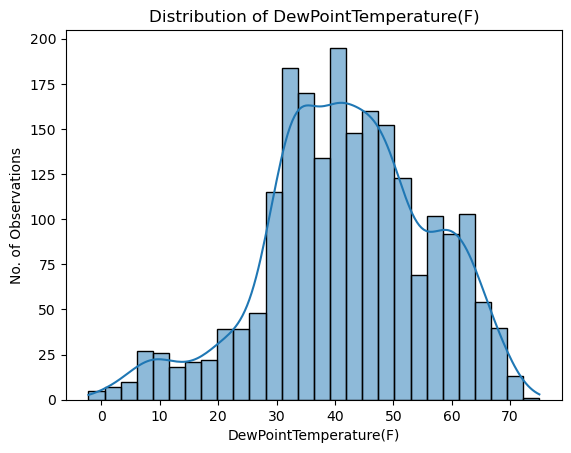

In [802]:
#f(2). Starting with DewPointTemperature(F)
sns.histplot(x = 'DPT_F',
            data = df_full,
            kde = True)


# title and labels
plt.title (label  = 'Distribution of DewPointTemperature(F)')
plt.xlabel(xlabel = 'DewPointTemperature(F)')
plt.ylabel(ylabel = 'No. of Observations')


# displaying the plot
plt.show()

In [803]:
# Calculating the mean of 'DewPointTemperature(F)'excluding missing values
mean_dpt = df_full['DPT_F'].mean()

# Imputing missing values with the mean
df_full['DPT_F'].fillna(mean_dpt, inplace=True)

# Verify if there are any missing values left
mv_after_imputation_dpt = df_full['DPT_F'].isnull().sum()

print("Missing values after imputation:", mv_after_imputation_dpt)

Missing values after imputation: 0


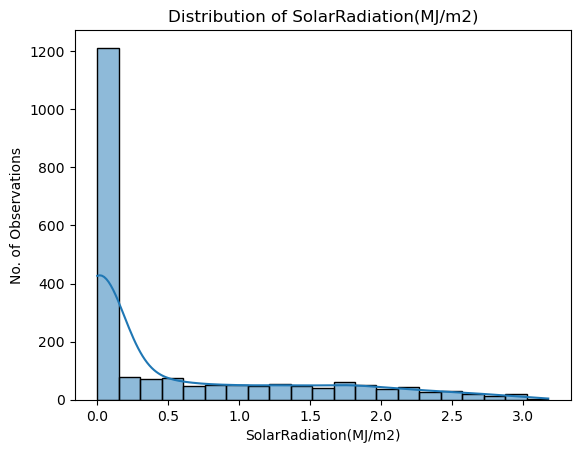

In [804]:
#f(3). Starting with SolarRadiation(MJ/m2)
sns.histplot(x = 'Solar_mJm2',
            data = df_full,
            kde = True)


# title and labels
plt.title (label  = 'Distribution of SolarRadiation(MJ/m2)')
plt.xlabel(xlabel = 'SolarRadiation(MJ/m2)')
plt.ylabel(ylabel = 'No. of Observations')


# displaying the plot
plt.show()

In [805]:
df_full['Solar_mJm2'].value_counts()

Solar_mJm2
0.00    1040
0.01      28
0.03      24
0.02      20
0.05      13
0.06      11
0.07      11
0.43      10
0.12      10
0.46      10
0.32       9
0.11       8
0.65       8
1.86       8
0.04       8
0.48       8
0.10       8
0.55       7
0.51       7
0.15       7
1.68       7
2.16       7
0.13       7
0.19       7
0.69       7
1.29       6
1.28       6
1.34       6
1.00       6
0.08       6
0.26       6
0.99       6
0.20       6
1.06       6
0.22       6
1.75       6
0.78       6
1.80       6
0.23       6
0.83       6
1.42       6
0.71       6
0.16       6
0.09       6
0.34       6
0.60       6
0.24       6
0.84       5
1.51       5
1.22       5
1.52       5
0.35       5
1.47       5
0.81       5
0.17       5
0.42       5
0.28       5
1.70       5
0.57       5
1.25       5
0.27       5
1.19       5
0.21       5
2.04       5
2.89       5
0.80       5
1.57       5
1.82       5
1.41       5
2.35       5
1.37       5
0.41       5
2.20       5
0.14       5
0.50       5
1.88       4
1

In [806]:
# imputing Solar Radiation
df_full['Solar_mJm2'].fillna(value   = 0   ,
                                       inplace = True)

In [807]:
#Checking for any null columns in the dataset. We will check by column because rentals will still have
#missing values 
df_full.isnull().any()

DateHour          False
Temp_F            False
Hum_per           False
WS_mph            False
V_miles           False
DPT_F             False
R_in              False
S_in              False
Solar_mJm2        False
Holiday           False
FunctioningDay    False
RENTALS            True
set               False
m_V_miles         False
m_DPT_F           False
m_Solar_mJm2      False
m_RENTALS         False
dtype: bool

<br><h3>Transformations</h3>

In [809]:
## Transformations ##

## TRANSFORMATION 1. Changing the DateHour column to split Date from Time
#dropping microseconds

def to_datetime_mixed(date_str):
    try:
        # Try parsing with microseconds
        return pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S.%f')
    except ValueError:
        # If microseconds fail, parse without them
        return pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S')

# Apply the function to the 'DateHour' column
df_full['DateHour'] = df_full['DateHour'].apply(to_datetime_mixed)

# Separate 'DateHour' into 'Date' and 'Time'
df_full['Date'] = df_full['DateHour'].dt.date
df_full['Time'] = df_full['DateHour'].dt.time

def drop_microseconds(time_obj):
    return time_obj.replace(microsecond=0)

# Apply the function to the 'Time' column
df_full['Time'] = df_full['Time'].apply(drop_microseconds)



In [810]:
# dropping DateHour and ID 
df_full.drop(columns = ['DateHour'],
             axis    = 1,
             inplace = True,
             errors  = 'ignore')

In [811]:
#TRANSFORMATION 2 & 3 : CONVERTING HOLIDAY & FUNCTIONING DAY TO DUMMY VARIABLES

# Convert boolean values to integers (True to 1, False to 0)
df_full['Holiday']            = pd.get_dummies(df_full['Holiday'], drop_first=True)
df_full['FunctioningDay']     = pd.get_dummies(df_full['FunctioningDay'], drop_first=True)


In [812]:
df_full['Holiday']            = df_full['Holiday'].astype(int)
df_full['FunctioningDay']     = df_full['FunctioningDay'].astype(int)


In [813]:
# TRANSFORMATION 4: log transforming skewed features
df_full['log_WS_mph']         = np.log1p(df_full['WS_mph'])
df_full['log_V_miles']        = np.log1p(df_full['V_miles'])
df_full['log_R_in']           = np.log1p(df_full['R_in'])
df_full['log_S_in']           = np.log1p(df_full['S_in'])
df_full['log_Solar_mJm2']     = np.log1p(df_full['Solar_mJm2'])
df_full['log_RENTALS']        = np.log1p(df_full['RENTALS'])

<br><h3>Feature Engineering</h3>

In [814]:
#NEW FEATURE 1: Determine Weekday/Weekend - BINARY VARIABLE i.e. WEEKEND = 1; WEEKDAYS = 0

# Assuming df_full is your DataFrame and it already has a 'Date' column
df_full['Date'] = pd.to_datetime(df_full['Date'])

# Create "Weekend" column: 1 if the day is Saturday or Sunday, 0 otherwise
df_full['Weekend'] = np.where(df_full['Date'].dt.dayofweek.isin([5, 6]), 1, 0)

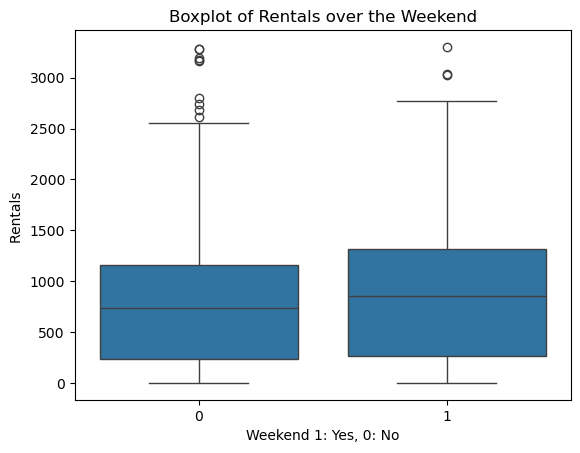

In [815]:
#Creating a BoxPlot to Visualize No. of Rentals over the Weekend
sns.boxplot(x    = 'Weekend',
            y    = 'RENTALS',
            data = df_full)


# titles and axis labels
plt.title(label   = 'Boxplot of Rentals over the Weekend')
plt.xlabel(xlabel = 'Weekend 1: Yes, 0: No')
plt.ylabel(ylabel = 'Rentals ')


# displaying the plot
plt.show()

We note here that on average there are slightly more rentals on a weekend as compared to a week day however there isn't a large variance and it may not be significant 

In [816]:
#NEW FEATURE 2: Determine Day - CATEGORICAL VARIABLE
#In the 'DayOfWeek' column, the days are represented as follows:
#0: Monday
#1: Tuesday
#2: Wednesday
#3: Thursday
#4: Friday
#5: Saturday
#6: Sunday

# Create 'DayOfWeek' column to numerically indicate the day of the week
df_full['DayOfWeek'] = df_full['Date'].dt.dayofweek

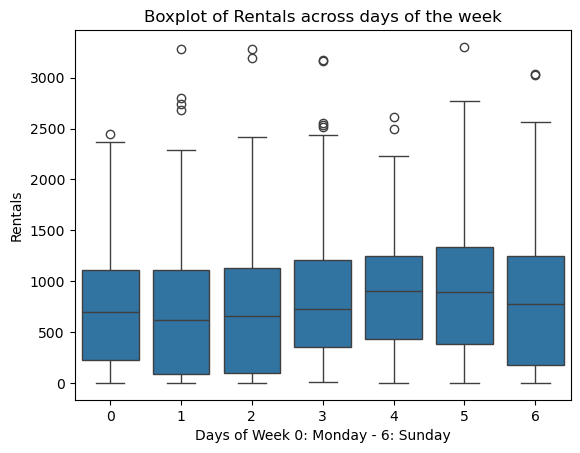

In [817]:
#Creating a BoxPlot to Visualize No. of Rentals across the Days of the Week
sns.boxplot(x    = 'DayOfWeek',
            y    = 'RENTALS',
            data = df_full)


# titles and axis labels
plt.title(label   = 'Boxplot of Rentals across days of the week')
plt.xlabel(xlabel = 'Days of Week 0: Monday - 6: Sunday')
plt.ylabel(ylabel = 'Rentals')


# displaying the plot
plt.show()

In [818]:
#NEW FEATURE 3: Segmenting time of day based on the time - CATEGORICAL VARIABLE
# Define time ranges with corresponding numeric categories
time_ranges = [
    ('Morning', pd.to_datetime('05:00:00').time(), 0),  # Morning as 0
    ('Afternoon', pd.to_datetime('12:00:00').time(), 1),  # Afternoon as 1
    ('Evening', pd.to_datetime('17:00:00').time(), 2),  # Evening as 2
    ('Late Hours', pd.to_datetime('21:00:00').time(), 3)  # Late Hours as 3
]

# Create a new 'TimeOfDay' column based on time ranges
def categorize_time(time_obj):
    current_category = 3  # Default to 'Late Hours' as 3
    for category, start_time, numeric_category in time_ranges:
        if time_obj >= start_time:
            current_category = numeric_category
        else:
            break  # Exit loop once the time is less than the start time of a category
    return current_category

# Assuming df_full['Time'] is a column with datetime.time values
df_full['TimeOfDay'] = df_full['Time'].apply(categorize_time)


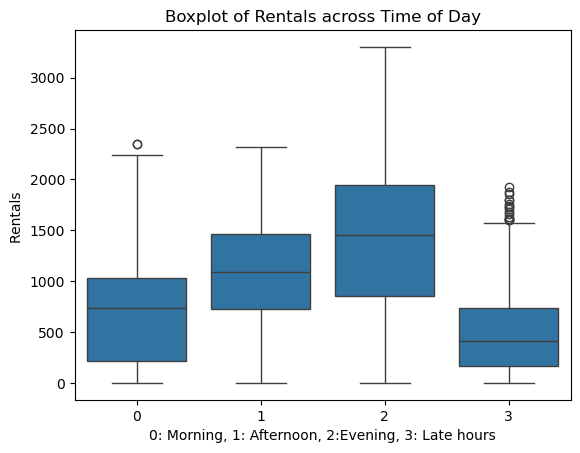

In [819]:
#Creating a BoxPlot to Visualize No. of Rentals across time of day
sns.boxplot(x    = 'TimeOfDay',
            y    = 'RENTALS',
            data = df_full)


# titles and axis labels
plt.title(label   = 'Boxplot of Rentals across Time of Day')
plt.xlabel(xlabel = '0: Morning, 1: Afternoon, 2:Evening, 3: Late hours')
plt.ylabel(ylabel = 'Rentals ')


# displaying the plot
plt.show()

In [820]:
#FEATURE 4: HumidityLevel - CATEGORICAL VARIABLE
conditions_humidity = [
    (df_full['Hum_per'] < 30),
    (df_full['Hum_per'] >= 30) & (df_full['Hum_per'] < 60),
    (df_full['Hum_per'] >= 60) & (df_full['Hum_per'] < 80),
    (df_full['Hum_per'] >= 80)
]
choices_humidity = [0, 1, 2, 3]
df_full['HumidityLevel'] = np.select(conditions_humidity, choices_humidity, default=np.nan)

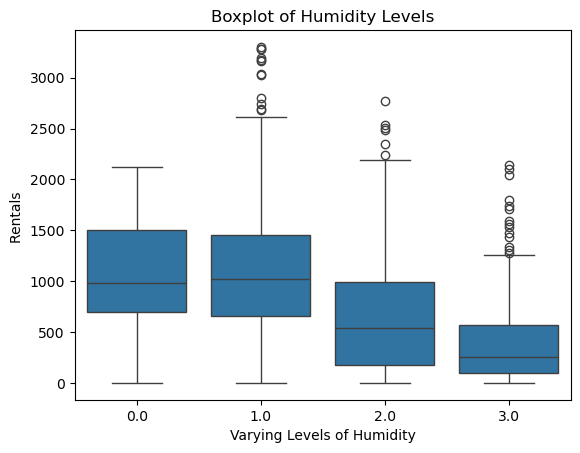

In [821]:
#Creating a BoxPlot to Visualize Humidity
sns.boxplot(x    = 'HumidityLevel',
            y    = 'RENTALS',
            data = df_full)


# titles and axis labels
plt.title(label   = 'Boxplot of Humidity Levels')
plt.xlabel(xlabel = 'Varying Levels of Humidity')
plt.ylabel(ylabel = 'Rentals ')


# displaying the plot
plt.show()

In [839]:
#FEATURE 5: WindSpeedCategory
conditions_wind = [
    (df_full['WS_mph'] < 3),
    (df_full['WS_mph'] >= 3) & (df_full['WS_mph'] < 6),
    (df_full['WS_mph'] >= 6) & (df_full['WS_mph'] < 9),
    (df_full['WS_mph'] >= 9)
]
choices_wind = [0, 1, 2, 3]
df_full['WindSpeedCategory'] = np.select(conditions_wind, choices_wind, default=np.nan)


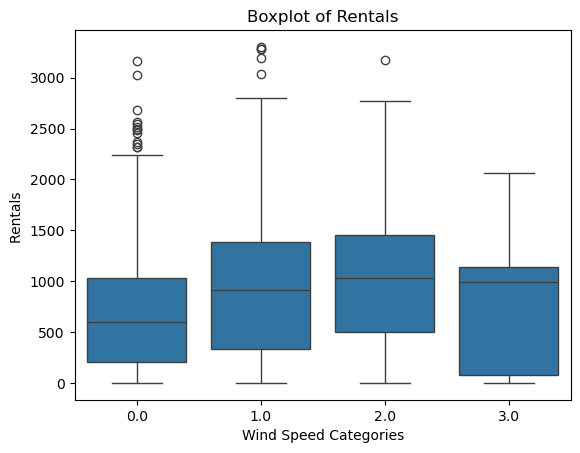

In [840]:
#Creating a BoxPlot to Visualize No. of Rentals depending on the speed of wind
sns.boxplot(x    = 'WindSpeedCategory',
            y    = 'RENTALS',
            data = df_full)


# titles and axis labels
plt.title(label   = 'Boxplot of Rentals')
plt.xlabel(xlabel = 'Wind Speed Categories')
plt.ylabel(ylabel = 'Rentals ')


# displaying the plot
plt.show()

In [841]:
#FEATURE6: GoodWeather
conditions_weather = [
    (df_full['R_in'] > 0) | (df_full['S_in'] > 0) | (df_full['WindSpeedCategory'] >= 3)
]
choices_weather = [0]
default_weather = 1
df_full['GoodWeather'] = np.select(conditions_weather, choices_weather, default=default_weather)

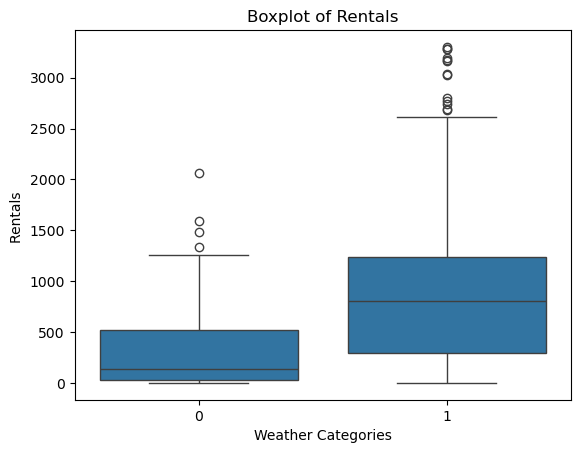

In [842]:
#Creating a BoxPlot to Visualize No. of Rentals depending on the weather
sns.boxplot(x    = 'GoodWeather',
            y    = 'RENTALS',
            data = df_full)


# titles and axis labels
plt.title(label   = 'Boxplot of Rentals')
plt.xlabel(xlabel = 'Weather Categories')
plt.ylabel(ylabel = 'Rentals ')


# displaying the plot
plt.show()

In [843]:
#FEATURE 7: FDH - Functioning Day and Holiday

# Creating the 'FDH' feature
df_full['FDH'] = ((df_full['FunctioningDay'] == 1) & (df_full['Holiday'] == 1)).astype(int)

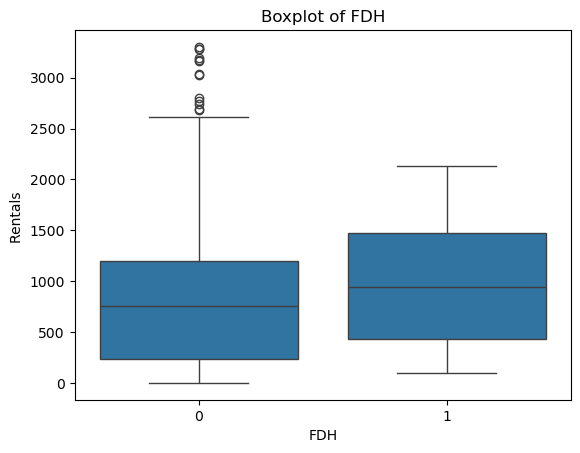

In [844]:
#Creating a BoxPlot to Visualize No. of Rentals depending on the weather
sns.boxplot(x    = 'FDH',
            y    = 'RENTALS',
            data = df_full)


# titles and axis labels
plt.title(label   = 'Boxplot of FDH')
plt.xlabel(xlabel = 'FDH')
plt.ylabel(ylabel = 'Rentals ')


# displaying the plot
plt.show()

In [855]:
#FEATURE 8: Rentals Lag
df_full['R_Lag1'] = df_full['RENTALS'].shift(1)

In [859]:
#FEATURE 9: Creating a feature to capture rentals on a rainy weekend day with the 
#hypothesis that it would be very minor 
# The feature is 1 if 'R_in' > 0 (indicating rain) and 'Weekend' == 1 (indicating it's a weekend)
# Otherwise, the feature is 0
df_full['Rain_On_Weekend'] = ((df_full['R_in'] > 0) & (df_full['Weekend'] == 1)).astype(int)


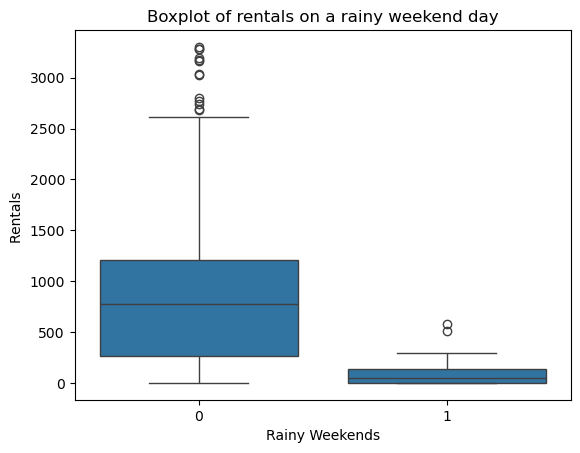

In [860]:
#Creating a BoxPlot to Visualize No. of Rentals depending on the weather
sns.boxplot(x    = 'Rain_On_Weekend',
            y    = 'RENTALS',
            data = df_full)


# titles and axis labels
plt.title(label   = 'Boxplot of rentals on a rainy weekend day')
plt.xlabel(xlabel = 'Rainy Weekends')
plt.ylabel(ylabel = 'Rentals ')


# displaying the plot
plt.show()

In [861]:
# FEATURE 10: CREATING FLAG VARIABLES 
#ASSESSING THE NEED FOR FLAG FEATURES 
temp_zeroes     = len(df_full['Temp_F'][df_full['Temp_F'] == 0])
hum_zeroes      = len(df_full['Hum_per'][df_full['Hum_per'] == 0])
ws_zeroes       = len(df_full['WS_mph'][df_full['WS_mph'] == 0])
vis_zeroes      = len(df_full['V_miles'][df_full['V_miles'] == 0])
dpt_zeroes      = len(df_full['DPT_F'][df_full['DPT_F'] == 0])
rain_zeroes      = len(df_full['R_in'][df_full['R_in'] == 0])
snow_zeroes      = len(df_full['S_in'][df_full['S_in'] == 0])
solar_zeroes      = len(df_full['Solar_mJm2'][df_full['Solar_mJm2'] == 0])



## the table below has been coded for you ##

# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Temperature    | {temp_zeroes}\t\t{len(df_full) - temp_zeroes}
Humidity       | {hum_zeroes}\t\t{len(df_full) - hum_zeroes}
WindSpeed      | {ws_zeroes}\t\t{len(df_full) - ws_zeroes}
Visibility     | {vis_zeroes}\t\t{len(df_full) - vis_zeroes}
DPT            | {dpt_zeroes}\t\t{len(df_full) - dpt_zeroes}
Rainfall       | {rain_zeroes}\t\t{len(df_full) - rain_zeroes}
Snowfall       | {snow_zeroes}\t\t{len(df_full) - snow_zeroes}
Solar          | {solar_zeroes}\t\t{len(df_full) - solar_zeroes}

""")


                 No		Yes
               ---------------------
Temperature    | 0		2184
Humidity       | 0		2184
WindSpeed      | 35		2149
Visibility     | 1		2183
DPT            | 1		2183
Rainfall       | 2090		94
Snowfall       | 2152		32
Solar          | 1146		1038




In [862]:
#Based on the breakdown above, creating a flag category only makes 
#sense for SolarRadiation

df_full['has_Solar_mJm2']      = 0


for index, value in df_full.iterrows():
    

    # Solar Radiation
    if df_full.loc[index, 'Solar_mJm2'] > 0:
        df_full.loc[index, 'has_Solar_mJm2'] = 1
        
    else:
        df_full.loc[index, 'has_Solar_mJm2'] = 0

In [863]:
# checking results
df_full[  ['has_Solar_mJm2']  ].head(n = 5)

,has_Solar_mJm2
ID,
mb_1039,0
mb_1330,1
mb_551,0
mb_2103,1
mb_1430,1


CONDUCTING INITIAL EVALUATION TO DETERMINE THE SIGNIFICANCE OF EACH VARIABLE USING STANDARD OLS REGRESSION 


In [865]:
df_full.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 2184 entries, mb_1039 to mb_1225
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Temp_F             2184 non-null   int64         
 1   Hum_per            2184 non-null   int64         
 2   WS_mph             2184 non-null   float64       
 3   V_miles            2184 non-null   float64       
 4   DPT_F              2184 non-null   float64       
 5   R_in               2184 non-null   float64       
 6   S_in               2184 non-null   float64       
 7   Solar_mJm2         2184 non-null   float64       
 8   Holiday            2184 non-null   int64         
 9   FunctioningDay     2184 non-null   int64         
 10  RENTALS            1638 non-null   float64       
 11  set                2184 non-null   int64         
 12  m_V_miles          2184 non-null   int64         
 13  m_DPT_F            2184 non-null   int64         
 14  m_So

In [866]:
#Creating a separate dataset for only numeric values (excluding date and time which are 
#represented in other features)

# Select only numeric columns for correlation calculation
df_full_numeric = df_full.select_dtypes(include=['float64', 'int64', 'int32'])

In [867]:
df_full_numeric.columns

Index(['Temp_F', 'Hum_per', 'WS_mph', 'V_miles', 'DPT_F', 'R_in', 'S_in', 'Solar_mJm2', 'Holiday', 'FunctioningDay', 'RENTALS', 'set', 'm_V_miles', 'm_DPT_F', 'm_Solar_mJm2', 'm_RENTALS', 'log_WS_mph', 'log_V_miles', 'log_R_in', 'log_S_in', 'log_Solar_mJm2', 'log_RENTALS', 'Weekend', 'DayOfWeek', 'TimeOfDay', 'HumidityLevel', 'WindSpeedCategory', 'GoodWeather', 'FDH', 'RENTALS_Lag1', 'Rain_On_Weekend', 'R_Lag1', 'has_Solar_mJm2'], dtype='object')

In [870]:
# analyzing (Pearson) correlations
df_corr = df_full_numeric.corr(method = 'pearson').round(2)

df_corr.loc[ : , ['RENTALS','log_RENTALS'] ].sort_values(by = 'RENTALS',
                                                                ascending = False)

,RENTALS,log_RENTALS
RENTALS,1.00,0.72
log_RENTALS,0.72,1.00
FunctioningDay,0.45,0.92
Temp_F,0.32,0.02
has_Solar_mJm2,0.32,0.13
log_Solar_mJm2,0.22,0.12
log_WS_mph,0.21,0.06
Solar_mJm2,0.20,0.12
WS_mph,0.19,0.05
GoodWeather,0.19,0.15


Assessing the correlation for both RENTALS and Log_RENTALS, it seems that RENTALS would be a better choice as the y-variable as we do not see strong relationships with most features with the exception of Functioning Day. 

In [869]:
# INSTANTIATING a model type
lm_rentals = smf.ols(formula = """RENTALS ~ 
                                            Temp_F +
                                            Hum_per +
                                            WS_mph +
                                            V_miles + 
                                            DPT_F +
                                            R_in + 
                                            S_in + 
                                            Solar_mJm2 + 
                                            Holiday + 
                                            FunctioningDay +
                                            m_V_miles + 
                                            m_DPT_F +
                                            m_Solar_mJm2 + 
                                            m_RENTALS + 
                                            Weekend + 
                                            TimeOfDay +
                                            HumidityLevel +
                                            WindSpeedCategory +
                                            GoodWeather +
                                            has_Solar_mJm2 + 
                                            FDH + 
                                            DayOfWeek +
                                            RENTALS_Lag1 +
                                            Rain_On_Weekend + 
                                            has_Solar_mJm2 + 
                                            log_WS_mph + 
                                            log_V_miles + 
                                            log_R_in + 
                                            log_S_in + 
                                            log_Solar_mJm2""",
                                            data = df_full_numeric)


# telling Python to FIT the data to the blueprint
results = lm_rentals.fit()

# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                RENTALS   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     77.19
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          2.63e-273
Time:                        20:54:27   Log-Likelihood:                -12247.
No. Observations:                1637   AIC:                         2.455e+04
Df Residuals:                    1608   BIC:                         2.471e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -731.3707    211.09

What is really surprising is that features that are expected to play a key role are not significant i.e. P value is >0.05. For example: Features such as Visibility, Holidays and Weekends. 
Most of the Featured that were engineered, do not seem to hold their ground such as Rain on a Weekend, Day of the Week, Functioning Day and a public holiday, Wind Speed Category, Weekend

<br><h3>Standardization</h3>

In [871]:
#ASSESSING THE DATAFRAME TO ENSURE ALL VARIABLES ARE ACCURATELY REPRESENTED
df_full_numeric.head(n=5)

,Temp_F,Hum_per,WS_mph,V_miles,DPT_F,R_in,S_in,Solar_mJm2,Holiday,FunctioningDay,RENTALS,set,m_V_miles,m_DPT_F,m_Solar_mJm2,m_RENTALS,log_WS_mph,log_V_miles,log_R_in,log_S_in,log_Solar_mJm2,log_RENTALS,Weekend,DayOfWeek,TimeOfDay,HumidityLevel,WindSpeedCategory,GoodWeather,FDH,RENTALS_Lag1,Rain_On_Weekend,R_Lag1,has_Solar_mJm2
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mb_1039,52,81,0.4,2.9,46.4,0.0,0.0,0.00,0,1,519.0,0,0,0,0,0,0.336472,1.360977,0.0,0.0,0.000000,6.253829,1,5,0,3.0,0.0,1,0,NaN,0,NaN,0
mb_1330,51,53,2.2,12.4,35.2,0.0,0.0,1.01,0,1,1251.0,0,1,0,0,0,1.163151,2.595255,0.0,0.0,0.698135,7.132498,0,3,0,1.0,0.0,1,0,519.0,0,519.0,1
mb_551,56,49,2.5,3.4,38.8,0.0,0.0,0.00,0,1,1685.0,0,0,0,0,0,1.252763,1.481605,0.0,0.0,0.000000,7.430114,1,5,3,1.0,0.0,1,0,1251.0,0,1251.0,0
mb_2103,69,32,9.8,12.4,38.7,0.0,0.0,2.36,0,0,0.0,0,0,0,0,0,2.379546,2.595255,0.0,0.0,1.211941,0.000000,0,1,1,1.0,3.0,0,0,1685.0,0,1685.0,1
mb_1430,53,20,2.9,10.8,12.9,0.0,0.0,1.96,0,1,814.0,0,0,0,0,0,1.360977,2.468100,0.0,0.0,1.085189,6.703188,0,0,1,0.0,0.0,1,0,0.0,0,0.0,1


In [872]:
## Standardization ##

# preparing explanatory variable data
rentals_data   = df_full_numeric.drop(['RENTALS','set'],
                                        axis = 1)


# preparing the target variable
rentals_target = df_full_numeric.loc[ : , 'RENTALS']




In [873]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(rentals_data)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(rentals_data)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe(include = 'number').round(decimals = 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
count,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,1638.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,2184.00,1638.00,2184.00,1638.00,2184.00
mean,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.44,-2.47,-1.62,-2.81,-3.21,-0.13,-0.11,-0.65,-0.24,-2.80,-0.19,-0.18,-0.23,-0.58,-2.76,-5.04,-0.14,-0.11,-0.72,-2.58,-0.63,-1.51,-1.26,-1.98,-0.86,-3.59,-0.21,-1.26,-0.12,-1.26,-0.95
25%,-0.73,-0.82,-0.75,-0.62,-0.61,-0.13,-0.11,-0.65,-0.24,0.36,-0.19,-0.18,-0.23,-0.58,-0.66,-0.31,-0.14,-0.11,-0.72,-0.13,-0.63,-1.01,-1.26,-0.75,-0.86,0.28,-0.21,-0.89,-0.12,-0.89,-0.95
50%,-0.03,-0.01,-0.21,0.59,0.00,-0.13,-0.11,-0.65,-0.24,0.36,-0.19,-0.18,-0.23,-0.58,0.01,0.56,-0.14,-0.11,-0.72,0.38,-0.63,-0.01,-0.03,-0.75,-0.86,0.28,-0.21,-0.10,-0.12,-0.10,-0.95
75%,0.83,0.79,0.56,0.77,0.66,-0.13,-0.11,0.47,-0.24,0.36,-0.19,-0.18,-0.23,0.00,0.71,0.66,-0.14,-0.11,0.76,0.58,1.58,0.99,1.19,0.48,0.52,0.28,-0.21,0.57,-0.12,0.57,1.05
max,2.61,2.02,4.57,0.77,2.39,18.88,16.07,3.33,4.15,0.36,5.27,5.62,4.43,1.73,2.59,0.66,17.10,15.48,2.57,1.03,1.58,1.49,1.19,1.72,3.26,0.28,4.66,3.76,8.33,3.76,1.05


In [875]:
#CREATING A SCALED DATAFRAME THAT I CAN USE FOR THE ANALYSIS GOING FORWARD

# Step 1: Convert the scaled data back to a DataFrame with column names
x_scaled_df = pd.DataFrame(x_scaled, columns=rentals_data.columns, index=rentals_data.index)

# Step 2: Add the 'RENTALS' target variable back to the DataFrame
x_scaled_df['RENTALS'] = rentals_target

# Step 3: Add the 'set' column back to the DataFrame
# Assuming 'set' column is in the original df_full_numeric DataFrame
x_scaled_df['set'] = df_full_numeric['set']

# Now, x_scaled_df is your scaled DataFrame with the target variable and 'set' included
# It's ready to be used for further analysis or modeling

# Step 4 (Optional): Verify the structure and the first few rows
x_scaled_df.head()


,Temp_F,Hum_per,WS_mph,V_miles,DPT_F,R_in,S_in,Solar_mJm2,Holiday,FunctioningDay,m_V_miles,m_DPT_F,m_Solar_mJm2,m_RENTALS,log_WS_mph,log_V_miles,log_R_in,log_S_in,log_Solar_mJm2,log_RENTALS,Weekend,DayOfWeek,TimeOfDay,HumidityLevel,WindSpeedCategory,GoodWeather,FDH,RENTALS_Lag1,Rain_On_Weekend,R_Lag1,has_Solar_mJm2,RENTALS,set
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mb_1039,-0.419144,1.165364,-1.422139,-1.973569,0.316730,-0.130085,-0.108634,-0.651443,-0.241121,0.357095,-0.189877,-0.1779,-0.225855,-0.57735,-2.077197,-2.050118,-0.138216,-0.110612,-0.717111,0.207599,1.581139,0.988788,-1.259495,1.719137,-0.85549,0.278306,-0.214423,NaN,-0.119994,NaN,-0.951714,519.0,0
mb_1330,-0.496912,-0.333392,-0.552855,0.766391,-0.496159,-0.130085,-0.108634,0.612391,-0.241121,0.357095,5.266578,-0.1779,-0.225855,-0.57735,-0.391524,0.664482,-0.138216,-0.110612,0.889130,0.599836,-0.632456,-0.011218,-1.259495,-0.750179,-0.85549,0.278306,-0.214423,-0.470268,-0.119994,-0.470268,1.050736,1251.0,0
mb_551,-0.108071,-0.547500,-0.407974,-1.829361,-0.234873,-0.130085,-0.108634,-0.651443,-0.241121,0.357095,-0.189877,-0.1779,-0.225855,-0.57735,-0.208796,-1.784816,-0.138216,-0.110612,-0.717111,0.732692,1.581139,0.988788,1.191414,-0.750179,-0.85549,0.278306,-0.214423,0.643211,-0.119994,0.643211,-0.951714,1685.0,0
mb_2103,0.902916,-1.457458,3.117455,0.766391,-0.242131,-0.130085,-0.108634,2.301674,-0.241121,-2.800376,-0.189877,-0.1779,-0.225855,-0.57735,2.088817,0.664482,-0.138216,-0.110612,2.071276,-2.584100,-0.632456,-1.011224,-0.442525,-0.750179,3.26293,-3.593164,-0.214423,1.303388,-0.119994,1.303388,1.050736,0.0,0
mb_1430,-0.341375,-2.099782,-0.214800,0.304924,-2.114677,-0.130085,-0.108634,1.801145,-0.241121,0.357095,-0.189877,-0.1779,-0.225855,-0.57735,0.011861,0.384825,-0.138216,-0.110612,1.779651,0.408193,-0.632456,-1.511227,-0.442525,-1.984837,-0.85549,0.278306,-0.214423,-1.259743,-0.119994,-1.259743,1.050736,814.0,0


In [877]:
df_full_numeric.head()

,Temp_F,Hum_per,WS_mph,V_miles,DPT_F,R_in,S_in,Solar_mJm2,Holiday,FunctioningDay,RENTALS,set,m_V_miles,m_DPT_F,m_Solar_mJm2,m_RENTALS,log_WS_mph,log_V_miles,log_R_in,log_S_in,log_Solar_mJm2,log_RENTALS,Weekend,DayOfWeek,TimeOfDay,HumidityLevel,WindSpeedCategory,GoodWeather,FDH,RENTALS_Lag1,Rain_On_Weekend,R_Lag1,has_Solar_mJm2
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mb_1039,52,81,0.4,2.9,46.4,0.0,0.0,0.00,0,1,519.0,0,0,0,0,0,0.336472,1.360977,0.0,0.0,0.000000,6.253829,1,5,0,3.0,0.0,1,0,NaN,0,NaN,0
mb_1330,51,53,2.2,12.4,35.2,0.0,0.0,1.01,0,1,1251.0,0,1,0,0,0,1.163151,2.595255,0.0,0.0,0.698135,7.132498,0,3,0,1.0,0.0,1,0,519.0,0,519.0,1
mb_551,56,49,2.5,3.4,38.8,0.0,0.0,0.00,0,1,1685.0,0,0,0,0,0,1.252763,1.481605,0.0,0.0,0.000000,7.430114,1,5,3,1.0,0.0,1,0,1251.0,0,1251.0,0
mb_2103,69,32,9.8,12.4,38.7,0.0,0.0,2.36,0,0,0.0,0,0,0,0,0,2.379546,2.595255,0.0,0.0,1.211941,0.000000,0,1,1,1.0,3.0,0,0,1685.0,0,1685.0,1
mb_1430,53,20,2.9,10.8,12.9,0.0,0.0,1.96,0,1,814.0,0,0,0,0,0,1.360977,2.468100,0.0,0.0,1.085189,6.703188,0,0,1,0.0,0.0,1,0,0.0,0,0.0,1


In [878]:
# analyzing (Pearson) correlations
x_scaled_corr = x_scaled_df.corr(method = 'pearson').round(2)

x_scaled_corr.loc[ : , ['RENTALS'] ].sort_values(by = 'RENTALS',
                                                                ascending = False)

,RENTALS
RENTALS,1.00
log_RENTALS,0.72
FunctioningDay,0.45
has_Solar_mJm2,0.32
Temp_F,0.32
log_Solar_mJm2,0.22
log_WS_mph,0.21
Solar_mJm2,0.20
GoodWeather,0.19
WS_mph,0.19


<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Data Partitioning</h2><br>
This is a very important step for your submission on Kaggle. Make sure to complete your data preparationbefore moving forward.
<br>
<br><h3>Separating the Kaggle Data</h3><br>

In [879]:
## parsing out testing data (needed for later) ##

# dataset for kaggle
kaggle_data = x_scaled_df[x_scaled_df['set'] == 1].copy()

# dataset for model building
df = x_scaled_df[x_scaled_df['set'] == 0].copy()

# dropping set identifier (kaggle)
kaggle_data.drop(labels='set', axis=1, inplace=True)

# dropping set identifier (model building)
df.drop(labels='set', axis=1, inplace=True)

In [880]:
kaggle_data.head()

,Temp_F,Hum_per,WS_mph,V_miles,DPT_F,R_in,S_in,Solar_mJm2,Holiday,FunctioningDay,m_V_miles,m_DPT_F,m_Solar_mJm2,m_RENTALS,log_WS_mph,log_V_miles,log_R_in,log_S_in,log_Solar_mJm2,log_RENTALS,Weekend,DayOfWeek,TimeOfDay,HumidityLevel,WindSpeedCategory,GoodWeather,FDH,RENTALS_Lag1,Rain_On_Weekend,R_Lag1,has_Solar_mJm2,RENTALS
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mb_382,1.213989,0.576567,1.089126,0.016507,1.717510,-0.130085,-0.108634,-0.651443,-0.241121,0.357095,-0.189877,-0.1779,-0.225855,1.732051,1.084613,0.190065,-0.138216,-0.110612,-0.717111,NaN,1.581139,0.988788,0.374444,0.484479,0.517317,0.278306,-0.214423,1.520912,-0.119994,1.520912,-0.951714,NaN
mb_547,0.436307,-1.082769,-0.552855,-2.088936,-0.220357,-0.130085,-0.108634,-0.388666,-0.241121,0.357095,-0.189877,-0.1779,-0.225855,1.732051,-0.391524,-2.288117,-0.138216,-0.110612,-0.278539,NaN,1.581139,0.988788,0.374444,-0.750179,-0.855490,0.278306,-0.214423,NaN,-0.119994,NaN,1.050736,NaN
mb_578,0.902916,-0.279865,-1.518726,-0.329593,0.476404,-0.130085,-0.108634,-0.651443,-0.241121,0.357095,-0.189877,-0.1779,-0.225855,1.732051,-2.391524,-0.068980,-0.138216,-0.110612,-0.717111,NaN,-0.632456,-1.511227,1.191414,-0.750179,-0.855490,0.278306,-0.214423,NaN,-0.119994,NaN,-0.951714,NaN
mb_187,0.902916,-0.868662,0.316429,-1.021794,0.353019,-0.130085,-0.108634,-0.326100,4.147288,0.357095,-0.189877,-0.1779,-0.225855,1.732051,0.518496,-0.701691,-0.138216,-0.110612,-0.185378,NaN,-0.632456,0.488785,0.374444,-0.750179,0.517317,0.278306,4.663690,NaN,-0.119994,NaN,1.050736,NaN
mb_227,1.369525,0.737148,1.716942,0.737550,1.608641,-0.130085,-0.108634,2.201568,-0.241121,0.357095,-0.189877,-0.1779,-0.225855,1.732051,1.451227,0.648008,-0.138216,-0.110612,2.015833,NaN,1.581139,1.488791,-1.259495,0.484479,1.890124,0.278306,-0.214423,NaN,-0.119994,NaN,1.050736,NaN


In [881]:
df.head()

,Temp_F,Hum_per,WS_mph,V_miles,DPT_F,R_in,S_in,Solar_mJm2,Holiday,FunctioningDay,m_V_miles,m_DPT_F,m_Solar_mJm2,m_RENTALS,log_WS_mph,log_V_miles,log_R_in,log_S_in,log_Solar_mJm2,log_RENTALS,Weekend,DayOfWeek,TimeOfDay,HumidityLevel,WindSpeedCategory,GoodWeather,FDH,RENTALS_Lag1,Rain_On_Weekend,R_Lag1,has_Solar_mJm2,RENTALS
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mb_1039,-0.419144,1.165364,-1.422139,-1.973569,0.316730,-0.130085,-0.108634,-0.651443,-0.241121,0.357095,-0.189877,-0.1779,-0.225855,-0.57735,-2.077197,-2.050118,-0.138216,-0.110612,-0.717111,0.207599,1.581139,0.988788,-1.259495,1.719137,-0.85549,0.278306,-0.214423,NaN,-0.119994,NaN,-0.951714,519.0
mb_1330,-0.496912,-0.333392,-0.552855,0.766391,-0.496159,-0.130085,-0.108634,0.612391,-0.241121,0.357095,5.266578,-0.1779,-0.225855,-0.57735,-0.391524,0.664482,-0.138216,-0.110612,0.889130,0.599836,-0.632456,-0.011218,-1.259495,-0.750179,-0.85549,0.278306,-0.214423,-0.470268,-0.119994,-0.470268,1.050736,1251.0
mb_551,-0.108071,-0.547500,-0.407974,-1.829361,-0.234873,-0.130085,-0.108634,-0.651443,-0.241121,0.357095,-0.189877,-0.1779,-0.225855,-0.57735,-0.208796,-1.784816,-0.138216,-0.110612,-0.717111,0.732692,1.581139,0.988788,1.191414,-0.750179,-0.85549,0.278306,-0.214423,0.643211,-0.119994,0.643211,-0.951714,1685.0
mb_2103,0.902916,-1.457458,3.117455,0.766391,-0.242131,-0.130085,-0.108634,2.301674,-0.241121,-2.800376,-0.189877,-0.1779,-0.225855,-0.57735,2.088817,0.664482,-0.138216,-0.110612,2.071276,-2.584100,-0.632456,-1.011224,-0.442525,-0.750179,3.26293,-3.593164,-0.214423,1.303388,-0.119994,1.303388,1.050736,0.0
mb_1430,-0.341375,-2.099782,-0.214800,0.304924,-2.114677,-0.130085,-0.108634,1.801145,-0.241121,0.357095,-0.189877,-0.1779,-0.225855,-0.57735,0.011861,0.384825,-0.138216,-0.110612,1.779651,0.408193,-0.632456,-1.511227,-0.442525,-1.984837,-0.85549,0.278306,-0.214423,-1.259743,-0.119994,-1.259743,1.050736,814.0


<br><h3>Train-Test Split</h3><br>
Note that the following code will remove non-numeric features, keeping only integer and float data types. It will also remove any observations that contain missing values. This is to prevent errors in the model building process. 

In [882]:
##All x-variables
#Index(['Temp_F', 'Hum_per', 'WS_mph', 'V_miles', 'DPT_F', 'R_in', 'S_in', 
#'Solar_mJm2', 'Holiday', 'FunctioningDay', 'RENTALS', 'set', 'm_V_miles', 
#'m_DPT_F', 'm_Solar_mJm2', 'm_RENTALS', 'log_WS_mph', 'log_V_miles', 
#'log_R_in', 'log_S_in', 'log_Solar_mJm2', 'log_RENTALS', 'Weekend', 
#'DayOfWeek', 'TimeOfDay', 'HumidityLevel', 'WindSpeedCategory', 
#'GoodWeather', 'FDH', 'RENTALS_Lag1', 'Rain_On_Weekend', 'has_Solar_mJm2'

#################
## full models ##
#################


# original x-data all x variables
x_original = [['Temp_F', 'Hum_per', 'WS_mph', 'V_miles', 'DPT_F', 'R_in', 'S_in', 
'Solar_mJm2', 'Holiday', 'FunctioningDay', 'm_V_miles', 
'm_DPT_F', 'm_Solar_mJm2', 'log_WS_mph', 'log_V_miles', 
'log_R_in', 'log_S_in', 'log_Solar_mJm2', 'Weekend', 
'DayOfWeek', 'TimeOfDay', 'HumidityLevel', 'WindSpeedCategory', 
'GoodWeather', 'FDH', 'RENTALS_Lag1', 'Rain_On_Weekend', 'has_Solar_mJm2']]



################
## original y ##
################

# highest correlation (anything in double digits, in the event that both a feature
#and its log transformation have a high correlation, retaining the original feature)
x_highcor = ['FunctioningDay','has_Solar_mJm2','Temp_F','log_WS_mph','GoodWeather',
             'WS_mph','DayOfWeek','Hum_per','R_in','Rain_On_Weekend','TimeOfDay']

# highest correlation and significant only
x_highcor_andsig = ['FunctioningDay','has_Solar_mJm2','Temp_F','log_WS_mph','GoodWeather',
             'WS_mph','DayOfWeek','Hum_per','R_in','Rain_On_Weekend','TimeOfDay']


#!##############################!#
#!# set your response variable #!#
#!##############################!#
y_variable = df['RENTALS']


In [938]:
#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
x_features = ['Temp_F', 'Hum_per', 'WS_mph', 'V_miles', 'DPT_F', 'R_in', 'S_in', 
'Solar_mJm2', 'Holiday', 'FunctioningDay', 'Weekend', 
'DayOfWeek', 'TimeOfDay', 'HumidityLevel', 'WindSpeedCategory', 
'GoodWeather', 'FDH', 'RENTALS_Lag1', 'Rain_On_Weekend', 'has_Solar_mJm2']


<br>

In [939]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# prepping data for train-test split
y_data = df['RENTALS']


# removing non-numeric columns and missing values
x_data = df[x_features].copy().select_dtypes(include=[int, float]).dropna(axis = 1)


# storing remaining x_features after the step above
x_features = list(x_data.columns)


# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )


# results of train-test split
print(f"""
Original Dataset Dimensions
---------------------------
Observations (Rows): {df.shape[0]}
Features  (Columns): {df.shape[1]}


Training Data (X-side)
----------------------
Observations (Rows): {x_train.shape[0]}
Features  (Columns): {x_train.shape[1]}


Training Data (y-side)
----------------------
Feature Name:        {y_train.name}
Observations (Rows): {y_train.shape[0]}


Testing Data (X-side)
---------------------
Observations (Rows): {x_test.shape[0]}
Features  (Columns): {x_test.shape[1]}


Testing Data (y-side)
---------------------
Feature Name:        {y_test.name}
Observations (Rows): {y_test.shape[0]}""")


Original Dataset Dimensions
---------------------------
Observations (Rows): 1638
Features  (Columns): 32


Training Data (X-side)
----------------------
Observations (Rows): 1228
Features  (Columns): 19


Training Data (y-side)
----------------------
Feature Name:        RENTALS
Observations (Rows): 1228


Testing Data (X-side)
---------------------
Observations (Rows): 410
Features  (Columns): 19


Testing Data (y-side)
---------------------
Feature Name:        RENTALS
Observations (Rows): 410


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Candidate Modeling</h2><br>
Develop your candidate models below.

In [940]:
##TEST 2: DECISION TREE HYPER PARAMETER TUNING
# declaring a hyperparameter space
criterion_range = ["mse", "friedman_mse", "mae", "poisson"]
splitter_range  = ['best', 'random']
depth_range     = np.arange(1, 100, 1)
leaf_range      = np.arange(1, 1001, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeRegressor(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 5,
                                   n_iter                = 1000,
                                   random_state          = 702)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(x_data, y_data)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 10, 'max_depth': 49, 'criterion': 'friedman_mse'}
Tuned Training AUC: 0.6832


/Users/reecharajsingh/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2555 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1330 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/reecharajsingh/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/reecharajsingh/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/reecharajsingh/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    valid

In [941]:
# naming the model
model_name = 'DecisionTreeRegression'




# model type
model = DecisionTreeRegressor(splitter         = 'best',
                              min_samples_leaf = 10,
                              max_depth        = 49,
                              criterion        = 'friedman_mse',
                              random_state     = 702)



<br>

In [942]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     DecisionTreeRegression
Train_Score:    0.8064
Test_Score:     0.6311
Train-Test Gap: 0.1753



<br>
<h3>Model Results</h3><br>
Remember that some models have coefficients, visual outputs, etc. Make sure to analyze relevant results for the models you build.

In [943]:
## Model Results ##

from sklearn.metrics import r2_score, mean_squared_error

# Predicting on the training set
train_preds = model.predict(x_train)

# Predicting on the test set
# Assuming x_test and y_test are your test data and target values
test_preds = model.predict(x_test)

# Evaluating the model
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

# Calculating RMSE for training and test sets
train_rmse = mean_squared_error(y_train, train_preds, squared=False)
test_rmse = mean_squared_error(y_test, test_preds, squared=False)

print(f"Training R^2: {train_r2:.4f}, Test R^2: {test_r2:.4f}")
print(f"Training RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")

Training R^2: 0.8064, Test R^2: 0.6311
Training RMSE: 286.1705, Test RMSE: 411.3568


<br>
<h3>Residual Analysis</h3><br>

In [944]:
## Residual Analysis ##

# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }


# converting residuals into df
model_resid_df = pd.DataFrame(data = model_residuals)


# checking results
model_resid_df.head(n = 5)


#!###########################!#
#!# add more code as needed #!#
#!###########################!#



,True,Predicted
ID,,
mb_1509,908.0,1078.615385
mb_559,131.0,210.333333
mb_040,1208.0,1595.454545
mb_1346,291.0,645.700000
mb_1463,1433.0,382.562500


In [945]:
# Adding a small constant to ensure positivity
y_train_positive = y_train + 1e-6  # Adjust the constant as appropriate for your data
y_test_positive = y_test + 1e-6

# Taking the logarithm of the adjusted values
log_y_train = np.log(y_train_positive)
log_y_test = np.log(y_test_positive)

In [946]:
# Assuming y_train and y_test have been adjusted to be strictly positive as shown above

# SCORING the results (on the log scale, as the model was trained on log scale)
model_train_score = model.score(x_train, log_y_train).round(4)
model_test_score = model.score(x_test, log_y_test).round(4)
model_gap = abs(model_train_score - model_test_score).round(4)

# dynamically printing results
model_summary = f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)


Model Name:     DecisionTreeRegression
Train_Score:    -22831.561
Test_Score:     -32269.4895
Train-Test Gap: 9437.9285



<br>
<h3>Hyperparameter Tuning</h3><br>

In [947]:
## Hyperparameter Tuning ##
##TEST 1: LINEAR REGRESSION HYPER PARAMETER TUNING
# Define the model
model = Ridge()

# Define the parameter distribution rather than a parameter grid
param_distributions = {'alpha': uniform(0.001, 100)}  # This defines a continuous distribution over the range 0.001 to 100.001





# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_distributions, 
                                   n_iter=1000, cv=5, 
                                   scoring='neg_mean_squared_error', 
                                   random_state=702)

# Fit RandomizedSearchCV
random_search.fit(x_train, y_train)

# Best hyperparameter value
print(f"Best alpha: {random_search.best_params_['alpha']}")

# Best model
best_model = random_search.best_estimator_


Best alpha: 13.941927858766771


In [ ]:
# KNN HYPER PARAMETER TUNING

#Declaring a hyperparameter space
n_neighbors_range = np.arange(1, 31, 1)  # Number of neighbors
weights_range = ['uniform', 'distance']  # Weight function used in prediction
metric_range = ['euclidean', 'manhattan', 'minkowski']  # Metric used for the distance computation

# Creating a hyperparameter grid
param_grid = {'n_neighbors': n_neighbors_range,
              'weights': weights_range,
              'metric': metric_range}

# Instantiating the model object without hyperparameters
tuned_knn = KNeighborsRegressor()

# RandomizedSearchCV object
tuned_knn_cv = RandomizedSearchCV(estimator=tuned_knn,
                                  param_distributions=param_grid,
                                  cv=5,
                                  n_iter=1000,  # You can adjust the number of iterations
                                  random_state=702)

# Fitting to the data (x_data and y_data should be your features and target variable)
tuned_knn_cv.fit(x_data, y_data)

# Printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_knn_cv.best_params_)
print("Tuned CV Score    :", tuned_knn_cv.best_score_.round(4))

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part IV: Preparing Submission File for Kaggle</h2><br>
The code below will store the predicted values for each of the models above.

In [775]:
# x-data
x_data_kaggle = kaggle_data[x_features].copy()


# y-data
y_data_kaggle = kaggle_data['RENTALS']


# Fitting model from above to the Kaggle test data
kaggle_predictions = model.predict(x_data_kaggle)

<br>
<h3>Creating the Kaggle File</h3><br>

In [776]:
## Kaggle Submission File ##

# organizing predictions
model_predictions = {"RENTALS" : kaggle_predictions}


# converting predictions into df
model_pred_df = pd.DataFrame(data  = model_predictions,
                             index = df_test.index)

<br>

In [777]:
#!######################!#
#!# name the .csv file #!#
#!######################!#

# name your model
model_pred_df.to_csv(path_or_buf = "./model_output/Final.csv",
                     index       = True,
                     index_label = 'ID')

<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

~~~

  _    _                           __  __           _      _ _             _ 
 | |  | |                         |  \/  |         | |    | (_)           | |
 | |__| | __ _ _ __  _ __  _   _  | \  / | ___   __| | ___| |_ _ __   __ _| |
 |  __  |/ _` | '_ \| '_ \| | | | | |\/| |/ _ \ / _` |/ _ \ | | '_ \ / _` | |
 | |  | | (_| | |_) | |_) | |_| | | |  | | (_) | (_| |  __/ | | | | | (_| |_|
 |_|  |_|\__,_| .__/| .__/ \__, | |_|  |_|\___/ \__,_|\___|_|_|_| |_|\__, (_)
              | |   | |     __/ |                                     __/ |  
              |_|   |_|    |___/                                     |___/   

                                                            

~~~

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>